In [1]:
# PROBLEM STATEMENT
# Prepare a prediction model for profit of 50_startups data.
# Do transformations for getting better predictions of profit
# make a table containing R^2 value for each prepared model.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
data=pd.read_csv('50_Startups.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [5]:
data1= pd.DataFrame(data)
data1.rename(columns = {'R&D Spend':'rnd_spend','Marketing Spend':'marketing_spend'}, inplace = True)
data1.head()
# renaming column names by removing spaces

,rnd_spend,Administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data1.shape

(50, 5)

In [7]:
data1['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [8]:
data1.info()   #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rnd_spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   marketing_spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
# One Hot Encoding State column
# Creating dummy variable for State column
data_cleaned=pd.get_dummies(data1,columns=['State'])
data_cleaned.head()

,rnd_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
data_cleaned.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rnd_spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   marketing_spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [11]:
data_cleaned2=data_cleaned.drop('State_New York',axis=1)
data_cleaned2.head()

,rnd_spend,Administration,marketing_spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [12]:
data_cleaned2.describe()

,rnd_spend,Administration,marketing_spend,Profit,State_California,State_Florida
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000


In [13]:
data_cleaned2[data_cleaned2.duplicated()] #no duplicates

,rnd_spend,Administration,marketing_spend,Profit,State_California,State_Florida


In [14]:
data_cleaned2.corr()
# profit highly correlated with R&D spend
# removing state_california as no correaltion

,rnd_spend,Administration,marketing_spend,Profit,State_California,State_Florida
rnd_spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
marketing_spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


In [15]:
data_cleaned3=data_cleaned2.drop('State_California',axis=1)
data_cleaned3.corr()

,rnd_spend,Administration,marketing_spend,Profit,State_Florida
rnd_spend,1.000000,0.241955,0.724248,0.972900,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493
marketing_spend,0.724248,-0.032154,1.000000,0.747766,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,0.116244
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000


## visualization

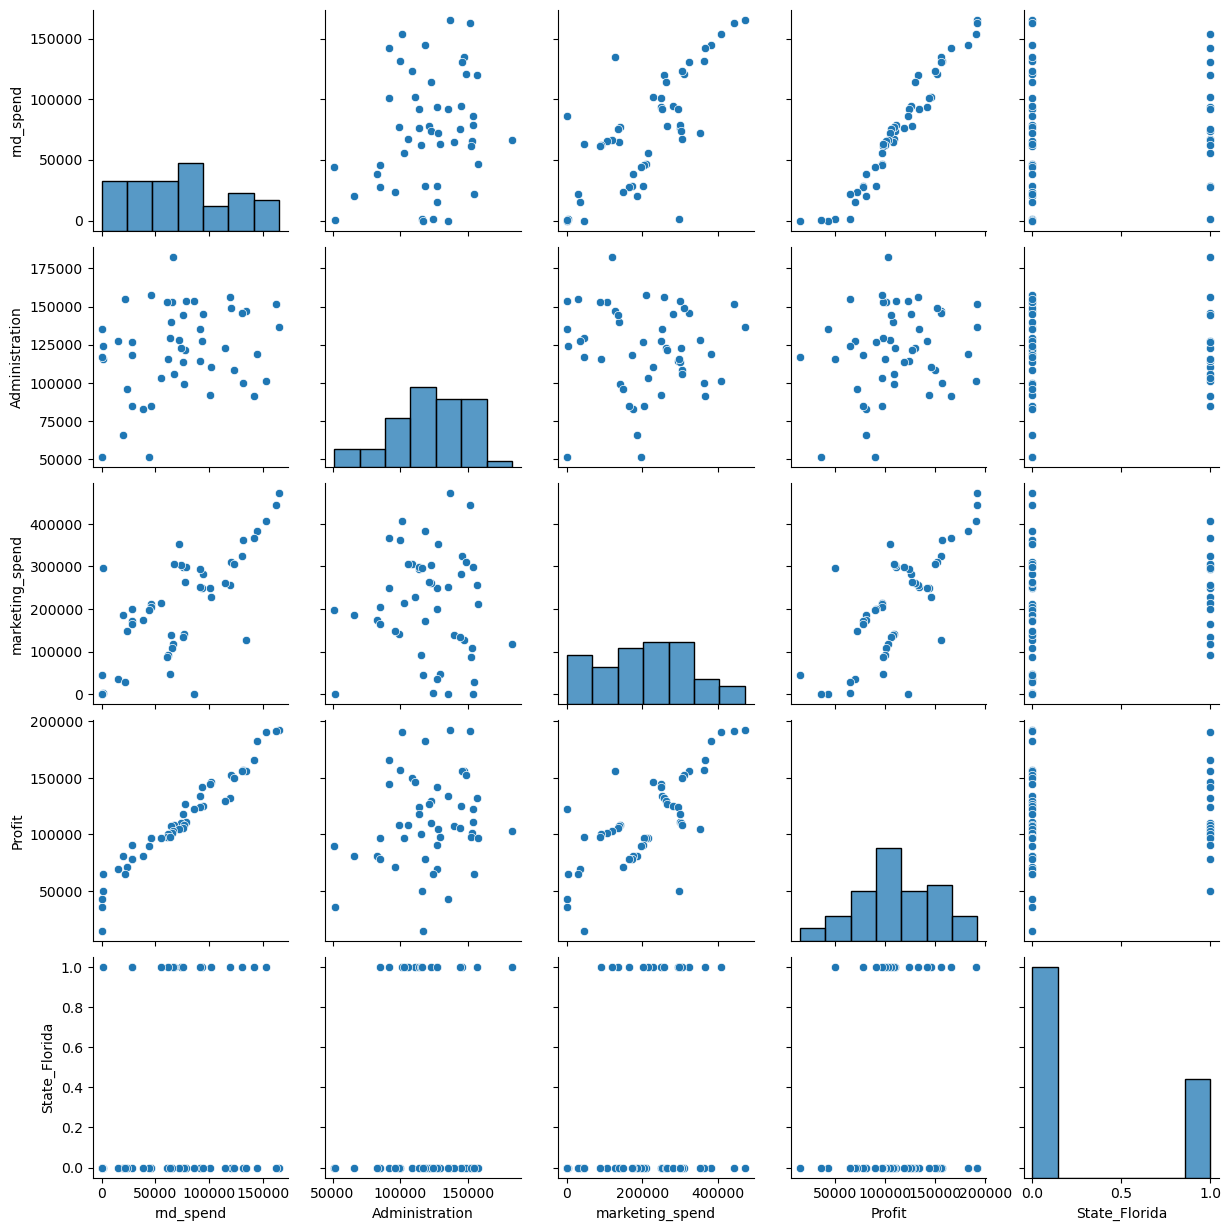

In [16]:
sns.pairplot(data_cleaned3)

<Axes: >

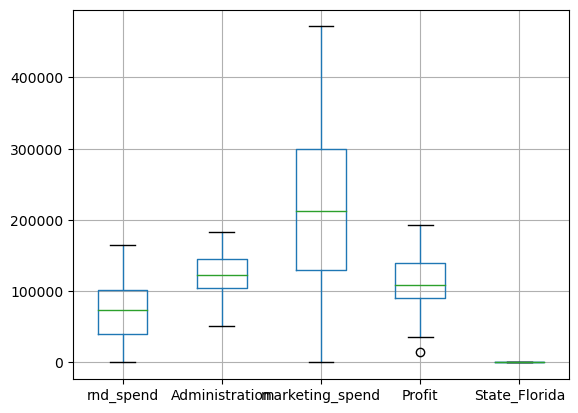

In [17]:
data_cleaned3.boxplot()

C:\Users\sycmy\AppData\Local\Temp\ipykernel_11416\1212360330.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned3['rnd_spend'])


<Axes: xlabel='rnd_spend', ylabel='Density'>

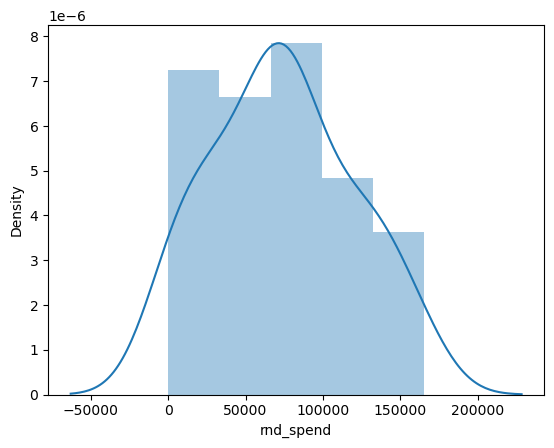

In [18]:
sns.distplot(data_cleaned3['rnd_spend'])

C:\Users\sycmy\AppData\Local\Temp\ipykernel_11416\4269142940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned3['Administration'])


<Axes: xlabel='Administration', ylabel='Density'>

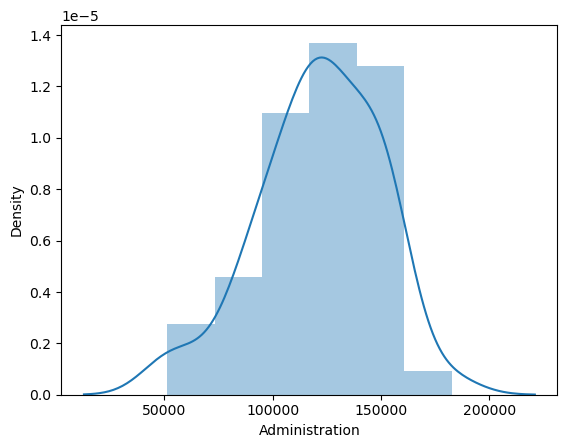

In [19]:
sns.distplot(data_cleaned3['Administration'])

C:\Users\sycmy\AppData\Local\Temp\ipykernel_11416\1465835990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned3['marketing_spend'])


<Axes: xlabel='marketing_spend', ylabel='Density'>

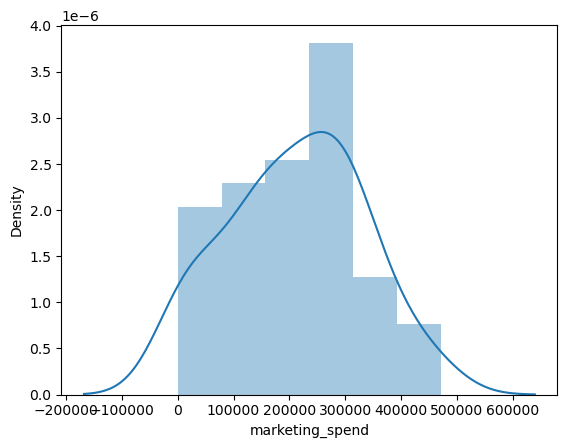

In [20]:
sns.distplot(data_cleaned3['marketing_spend'])

## Building model

In [21]:
model=smf.ols('Profit~rnd_spend+Administration+marketing_spend+State_Florida',data=data_cleaned3).fit()

In [22]:
model.params

Intercept          50106.252762
rnd_spend              0.805982
Administration        -0.026995
marketing_spend        0.026980
State_Florida        220.158452
dtype: float64

In [23]:
model.tvalues

Intercept           7.537189
rnd_spend          17.606204
Administration     -0.522726
marketing_spend     1.591665
State_Florida       0.075903
dtype: float64

In [24]:
model.pvalues

Intercept          1.639196e-09
rnd_spend          8.293975e-22
Administration     6.037292e-01
marketing_spend    1.184614e-01
State_Florida      9.398330e-01
dtype: float64

In [25]:
model.rsquared,  model.rsquared_adj

(0.9507522991055133, 0.94637472569267)

## SLR models

In [26]:
ml_rnd=smf.ols('Profit~rnd_spend',data=data_cleaned3).fit()
ml_rnd.pvalues

Intercept    2.782697e-24
rnd_spend    3.500322e-32
dtype: float64

In [27]:
ml_admin=smf.ols('Profit~Administration',data=data_cleaned3).fit()
ml_admin.pvalues
# admnistartion column not adding much information as p value greater than 0.05

Intercept         0.003824
Administration    0.162217
dtype: float64

In [28]:
ml_market=smf.ols('Profit~marketing_spend',data=data_cleaned3).fit()
ml_market.pvalues

Intercept          4.294735e-10
marketing_spend    4.381073e-10
dtype: float64

In [29]:
ml_statef=smf.ols('Profit~State_Florida',data=data_cleaned3).fit()
ml_statef.pvalues
# ste_florida column is not adding much information as p value greater than 0.05

Intercept        1.586129e-20
State_Florida    4.214479e-01
dtype: float64

## Building model by removing state_florida column

In [30]:
data4=data_cleaned3.drop('State_Florida',axis=1)
data4.corr()

,rnd_spend,Administration,marketing_spend,Profit
rnd_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [31]:
model2=smf.ols('Profit~rnd_spend+Administration+marketing_spend',data=data4).fit()
model2.params

Intercept          50122.192990
rnd_spend              0.805715
Administration        -0.026816
marketing_spend        0.027228
dtype: float64

In [32]:
model2.tvalues,   model2.pvalues

(Intercept           7.626218
 rnd_spend          17.846374
 Administration     -0.525507
 marketing_spend     1.655077
 dtype: float64,
 Intercept          1.057379e-09
 rnd_spend          2.634968e-22
 Administration     6.017551e-01
 marketing_spend    1.047168e-01
 dtype: float64)

In [33]:
model2.rsquared,   model2.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

## Building model- removing administration column

In [34]:
data5=data4.drop('Administration',axis=1)
data5.corr()

,rnd_spend,marketing_spend,Profit
rnd_spend,1.000000,0.724248,0.972900
marketing_spend,0.724248,1.000000,0.747766
Profit,0.972900,0.747766,1.000000


In [35]:
model3=smf.ols('Profit~rnd_spend+marketing_spend',data=data5).fit()
model3.params

Intercept          46975.864221
rnd_spend              0.796584
marketing_spend        0.029908
dtype: float64

In [36]:
model3.tvalues,   model3.pvalues

(Intercept          17.463582
 rnd_spend          19.265555
 marketing_spend     1.927052
 dtype: float64,
 Intercept          3.504062e-22
 rnd_spend          6.040433e-24
 marketing_spend    6.003040e-02
 dtype: float64)

In [37]:
model3.rsquared,   model3.rsquared_adj
# slight improvement in adjusted r square value 

(0.9504503015559763, 0.9483418037498477)

## VIF calculation

In [38]:
rsq_rnd=smf.ols('rnd_spend~Administration+marketing_spend+State_Florida',data=data_cleaned3).fit().rsquared
vif_rnd=1/(1-rsq_rnd)
rsq_admin=smf.ols('Administration~rnd_spend+marketing_spend+State_Florida',data=data_cleaned3).fit().rsquared
vif_admin=1/(1-rsq_admin)
rsq_market=smf.ols('marketing_spend~rnd_spend+Administration+State_Florida',data=data_cleaned3).fit().rsquared
vif_market=1/(1-rsq_market)
rsq_statef=smf.ols('State_Florida~Administration+marketing_spend+rnd_spend',data=data_cleaned3).fit().rsquared
vif_statef=1/(1-rsq_statef)

In [39]:
d1={'Variables':['rnd_spend','Administration','marketing_spend','State_Florida'],'VIF':[vif_rnd,vif_admin,vif_market,vif_statef]}
vif_df=pd.DataFrame(d1)
vif_df

,Variables,VIF
0,rnd_spend,2.483535
1,Administration,1.177558
2,marketing_spend,2.416796
3,State_Florida,1.050685


In [40]:
# VIF value indicates there is no multicollinearity
# There is no correlation between multiple independent variables in model.

## Residual Analysis

In [41]:
# assumption1 : residuals are independent and no visible pattern exists

eval_env: 1


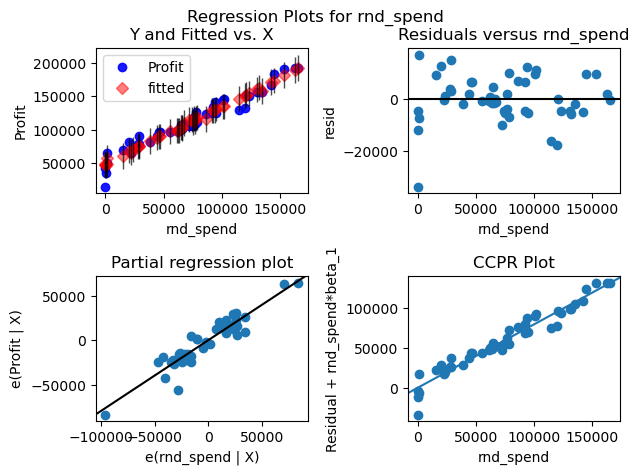

In [42]:
# residual plot
fig=sm.graphics.plot_regress_exog(model3,'rnd_spend')# assumption1 : residuals are independent and no visible pattern exists
# no pattern in residual plot, model is good fit 

eval_env: 1


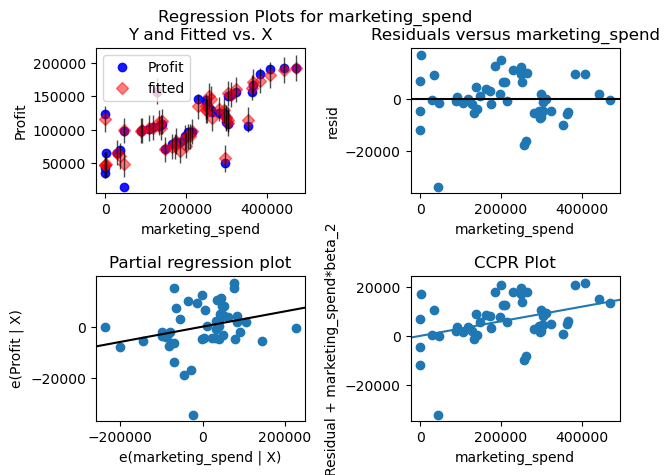

In [43]:
fig=sm.graphics.plot_regress_exog(model3,'marketing_spend')
# no pattern in residual plot, model is good fit 

<Axes: xlabel='rnd_spend', ylabel='Profit'>

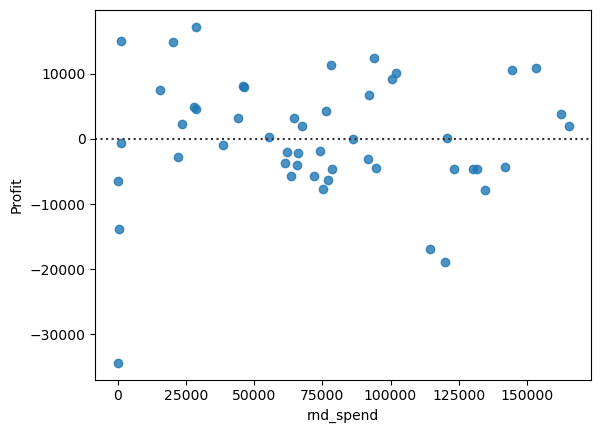

In [44]:
sns.residplot(x='rnd_spend',y='Profit',data=data5)    # residual plot using seaborn library

<Axes: xlabel='marketing_spend', ylabel='Profit'>

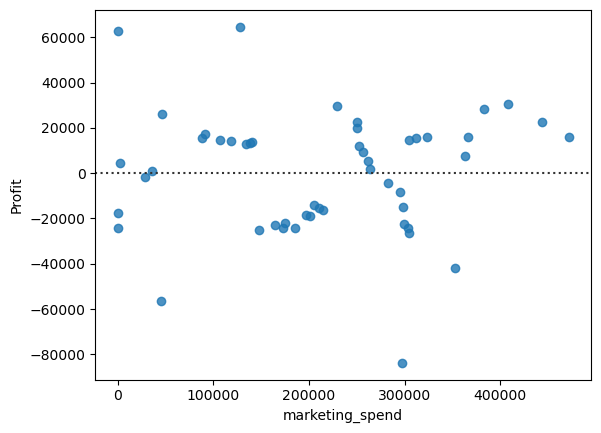

In [45]:
sns.residplot(x='marketing_spend',y='Profit',data=data5)

## Test for normality of residuals

In [46]:
# assumption2: residuals are normally distributed

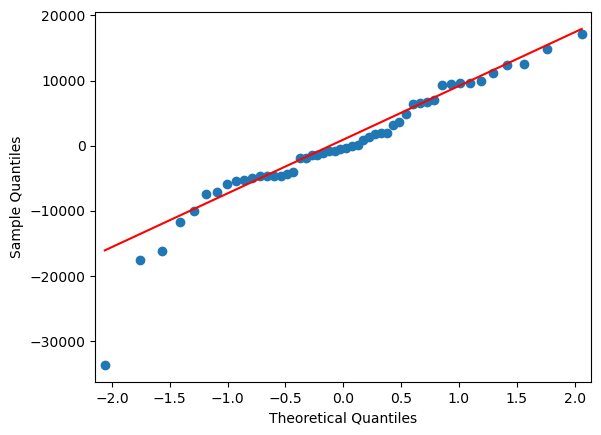

In [47]:
qq=sm.qqplot(model3.resid,line='q')   
# almost straight line, indicating good fit

## Homoscedasticity

In [48]:
# assumption3: constant variance

In [49]:
def get_standardized_values(x):
    return (x-x.mean())/x.std()

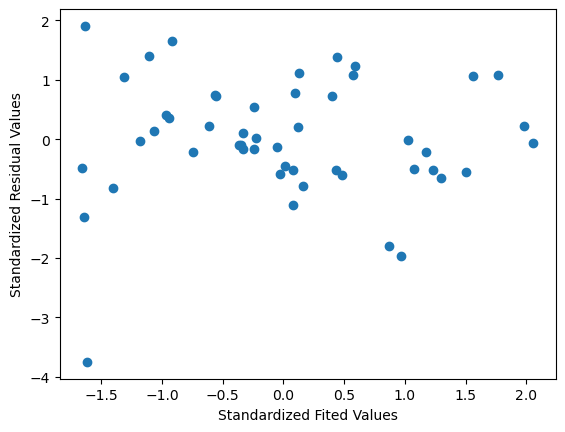

In [50]:
plt.scatter(get_standardized_values(model3.fittedvalues),get_standardized_values(model3.resid))
plt.xlabel('Standardized Fited Values')
plt.ylabel('Standardized Residual Values')
plt.show()

## Model Deletion Diagnostics ( checking outliers and influencers)

In [51]:
influence=model3.get_influence()
cooks=influence.cooks_distance
cooks

(array([1.81512394e-04, 2.17714151e-03, 3.85030256e-02, 2.97393985e-02,
        7.43914487e-03, 8.87288175e-03, 3.60799476e-03, 4.97976353e-03,
        2.01902031e-06, 4.00294501e-03, 1.64482064e-02, 1.07062146e-02,
        1.52583172e-02, 4.10195007e-03, 6.23696501e-02, 4.28041217e-02,
        1.08143179e-02, 3.37984862e-03, 2.70426509e-03, 5.18325214e-02,
        5.68610172e-04, 8.25784837e-03, 4.13103131e-03, 3.07888695e-04,
        2.54030757e-03, 2.87274239e-03, 4.56256249e-03, 3.76461096e-02,
        4.04646886e-06, 3.84226278e-04, 1.54537882e-04, 1.49920702e-04,
        7.91098475e-04, 7.81029691e-05, 6.23157729e-03, 6.50961158e-03,
        5.60674443e-02, 5.62367665e-04, 4.68122817e-02, 5.47791686e-04,
        2.06083678e-03, 2.68539324e-03, 3.32631540e-04, 2.55928157e-02,
        2.50014790e-05, 1.17553495e-01, 7.74416953e-02, 7.99827600e-03,
        5.61942095e-02, 3.89488623e-01]),
 array([0.99999657, 0.99985768, 0.98977563, 0.99300145, 0.99910561,
        0.99883656, 0.9996

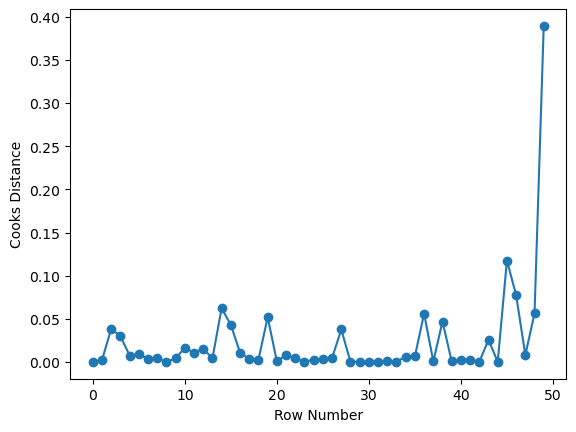

In [52]:
plt.scatter(data5.index,cooks[0])
plt.plot(data5.index,cooks[0])
plt.xlabel('Row Number')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
mean_cooks=np.mean(cooks[0])
influence_points=data5.index[cooks[0]>(4*mean_cooks)]
influence_points

Int64Index([45, 49], dtype='int64')

In [54]:
data5.iloc[influence_points,:] 
# 45 and 49 indices are influence points

,rnd_spend,marketing_spend,Profit
45,1000.23,1903.93,64926.08
49,0.00,45173.06,14681.40


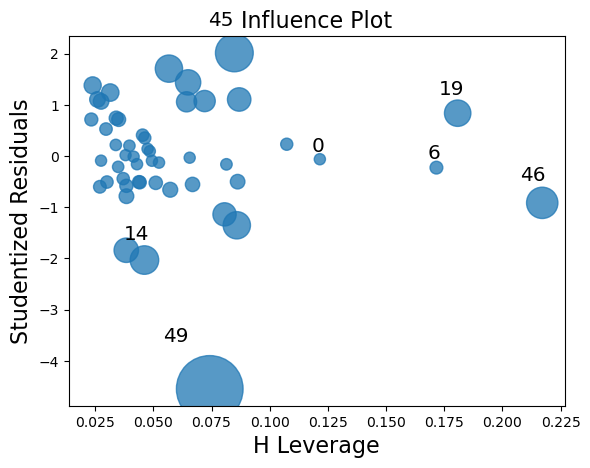

In [55]:
influence_plot(model3)
plt.show()
# plotting influence point to recheck influencers

## Improving Model

In [56]:
# discarding data points which are influencers and reassigning row number

In [57]:
data_new=data5.drop(data5.index[[45,49]],axis=0).reset_index()

In [58]:
data_new1=data_new.drop(['index'],axis=1)
data_new1.tail()

,rnd_spend,marketing_spend,Profit
43,15505.73,35534.17,69758.98
44,22177.74,28334.72,65200.33
45,1315.46,297114.46,49490.75
46,0.00,0.00,42559.73
47,542.05,0.00,35673.41


## Final Model

In [59]:
final_model=smf.ols('Profit~rnd_spend+marketing_spend',data=data_new1).fit()
final_model.params

Intercept          48337.919834
rnd_spend              0.781236
marketing_spend        0.030644
dtype: float64

In [60]:
final_model.tvalues, final_model.pvalues

(Intercept          20.324811
 rnd_spend          22.949488
 marketing_spend     2.407596
 dtype: float64,
 Intercept          2.630822e-24
 rnd_spend          1.783588e-26
 marketing_spend    2.021990e-02
 dtype: float64)

In [61]:
final_model.rsquared, final_model.rsquared_adj
# improvement in model

(0.9630083732824324, 0.9613643009838738)

In [62]:
# checking for influencers in new model
influence=final_model.get_influence()
cooks=influence.cooks_distance

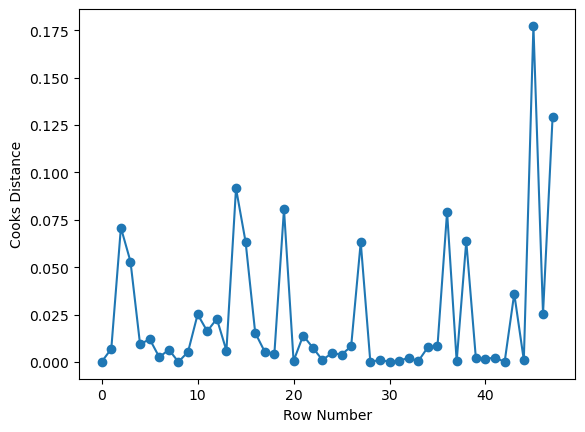

In [63]:
plt.scatter(data_new1.index,cooks[0])
plt.plot(data_new1.index,cooks[0])
plt.xlabel('Row Number')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
mean_cooks_new=np.mean(cooks[0])
influence_points=data_new1.index[cooks[0]>(4*mean_cooks_new)]
data_new1.iloc[influence_points,:] 

,rnd_spend,marketing_spend,Profit
45,1315.46,297114.46,49490.75
47,542.05,0.00,35673.41


In [65]:
data_new2=data_new1.drop(data_new1.index[[45,47]],axis=0).reset_index(drop=True)
data_new2.tail()

,rnd_spend,marketing_spend,Profit
41,27892.92,164470.71,77798.83
42,23640.93,148001.11,71498.49
43,15505.73,35534.17,69758.98
44,22177.74,28334.72,65200.33
45,0.00,0.00,42559.73


In [66]:
final_model2=smf.ols('Profit~rnd_spend+marketing_spend',data=data_new2).fit()

In [67]:
final_model2.rsquared, final_model2.rsquared_adj
# model accuracy is reduced

(0.9611920624974509, 0.9593870421484951)

In [68]:
# Hence final_model is a good fit model with an accuracy of 96.13%

## Prediction for new data

In [69]:
new_df=pd.DataFrame({'rnd_spend':66000,'marketing_spend':150000},index=[1])

In [70]:
final_model.predict(new_df)   # manual prediction

1    104496.045747
dtype: float64

In [71]:
pred=final_model.predict(data_new1)
pred

0     191971.871759
1     188967.782581
2     180712.567268
3     172869.490807
4     170578.036950
5     162484.310539
6     157418.056567
7     160056.281416
8     152059.053474
9     154037.325613
10    134978.418179
11    134639.569931
12    129323.660565
13    127948.270865
14    149902.391489
15    145829.670351
16    117385.111199
17    130946.620632
18    129053.092322
19    115852.080348
20    117062.367610
21    118763.657773
22    115439.961955
23    110436.010223
24    112835.198011
25    103083.998748
26    111295.326674
27    115493.839071
28    103560.235809
29    102874.391026
30     99562.829573
31     98803.185556
32     99287.414898
33     98268.997923
34     91067.261314
35     90583.553097
36     76894.358164
37     88804.665028
38     69819.220019
39     83823.845068
40     76096.941468
41     75168.869015
42     71342.371731
43     61540.451587
44     66532.246145
45     58470.311146
46     48337.919834
47     48761.388681
dtype: float64

In [72]:
df=pd.concat([data_new1['Profit'],pred],axis=1)
df
# dataframe of actual and predicted values for comparison

,Profit,0
0,192261.83,191971.871759
1,191792.06,188967.782581
2,191050.39,180712.567268
3,182901.99,172869.490807
4,166187.94,170578.036950
5,156991.12,162484.310539
6,156122.51,157418.056567
7,155752.60,160056.281416
8,152211.77,152059.053474
9,149759.96,154037.325613


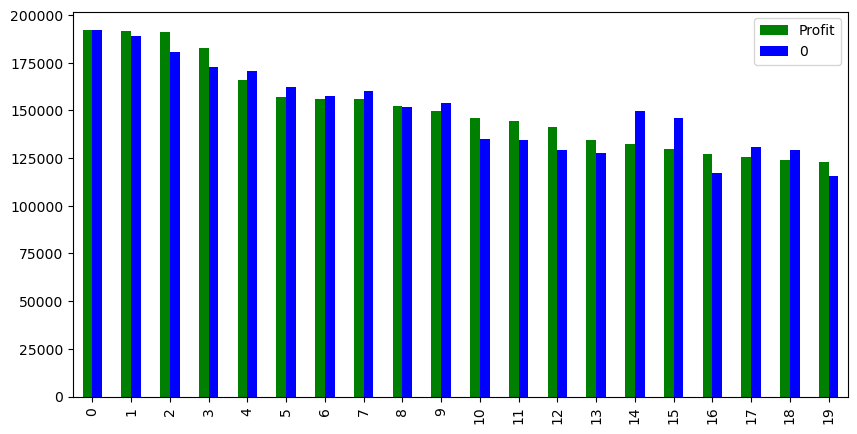

In [73]:
# bar plot between actual and predicted values
dff=df.head(20)
dff.plot(kind='bar',figsize=(10,5),color=['green','blue'])
plt.show()